# Build a Custom Gridworld Environment

Episode 1000/10000, Total Reward: 93, Epsilon: 0.050
Episode 2000/10000, Total Reward: 93, Epsilon: 0.050
Episode 3000/10000, Total Reward: 93, Epsilon: 0.050
Episode 4000/10000, Total Reward: 93, Epsilon: 0.050
Episode 5000/10000, Total Reward: 93, Epsilon: 0.050
Episode 6000/10000, Total Reward: 93, Epsilon: 0.050
Episode 7000/10000, Total Reward: 92, Epsilon: 0.050
Episode 8000/10000, Total Reward: 93, Epsilon: 0.050
Episode 9000/10000, Total Reward: 93, Epsilon: 0.050
Episode 10000/10000, Total Reward: 93, Epsilon: 0.050


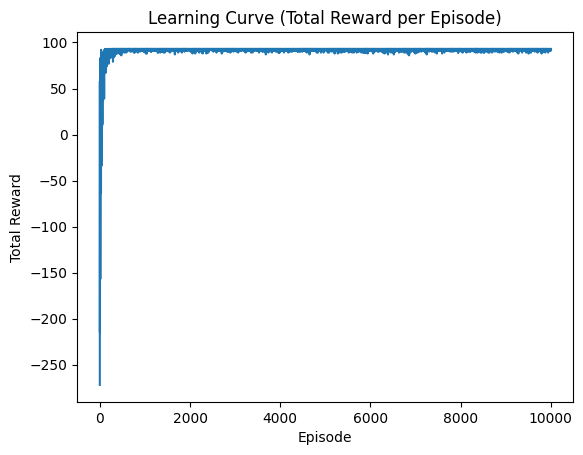

Final Path: [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]
Total Reward for the Path: 93


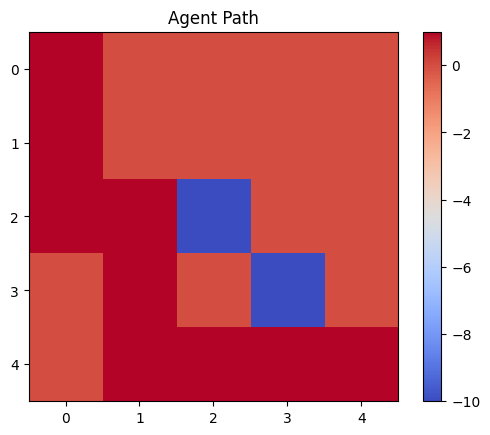

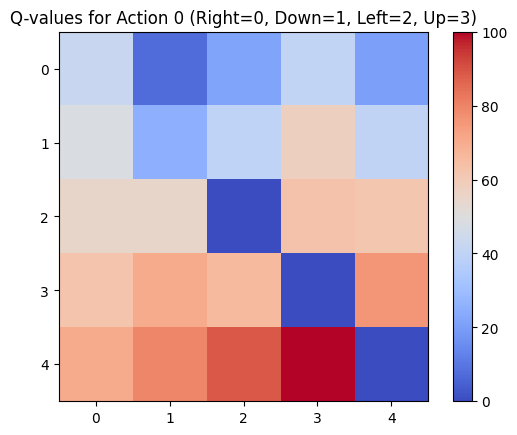

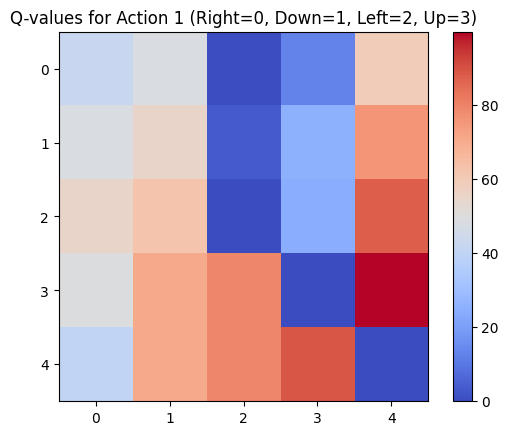

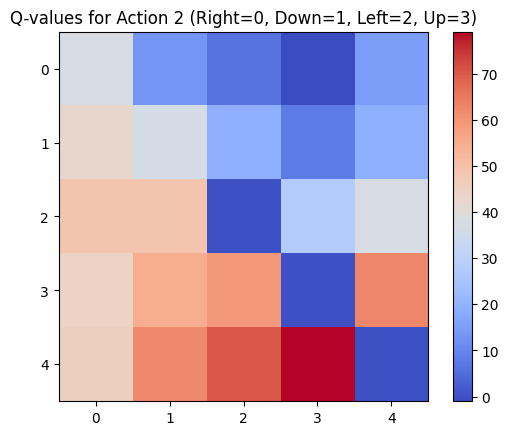

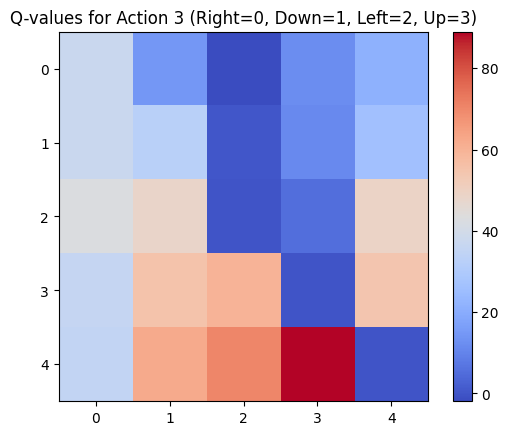

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define constants for the environment
GRID_SIZE = 5
START_STATE = (0, 0)
GOAL_STATE = (4, 4)
OBSTACLES = [(2, 2), (3, 3)]
ACTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

# Initialize Q-table
Q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# Define reward function
def get_reward(state):
    if state == GOAL_STATE:
        return 100
    elif state in OBSTACLES:
        return -10
    else:
        return -1

# Define action selection function with epsilon-greedy policy
def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(len(ACTIONS)))  # Explore
    else:
        return np.argmax(Q_table[state[0], state[1]])  # Exploit

# Q-Learning update
def update_q_table(state, action, reward, next_state, alpha, gamma):
    max_future_q = np.max(Q_table[next_state[0], next_state[1]])
    Q_table[state[0], state[1], action] += alpha * (reward + gamma * max_future_q - Q_table[state[0], state[1], action])

# Training function
def train(episodes, alpha, gamma, epsilon, epsilon_decay):
    rewards_per_episode = []  # Store the total reward for each episode

    for episode in range(episodes):
        state = START_STATE
        done = False
        total_reward = 0  # Track total reward per episode

        while not done:
            action = epsilon_greedy(state, epsilon)
            next_state = (state[0] + ACTIONS[action][0], state[1] + ACTIONS[action][1])

            # Ensure the agent doesn't go out of bounds or into obstacles
            if next_state[0] < 0 or next_state[0] >= GRID_SIZE or next_state[1] < 0 or next_state[1] >= GRID_SIZE or next_state in OBSTACLES:
                next_state = state  # Stay in the same place if invalid move

            reward = get_reward(next_state)
            total_reward += reward
            update_q_table(state, action, reward, next_state, alpha, gamma)

            if next_state == GOAL_STATE:
                done = True
            state = next_state

        epsilon = max(epsilon * epsilon_decay, 0.05)  # Decay epsilon
        rewards_per_episode.append(total_reward)

        if (episode + 1) % 1000 == 0:  # Print every 1000 episodes
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    # Plot the learning curve
    plt.plot(rewards_per_episode)
    plt.title("Learning Curve (Total Reward per Episode)")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

# Test function
def test():
    state = START_STATE
    path = [state]
    total_reward = 0

    while state != GOAL_STATE:
        action = np.argmax(Q_table[state[0], state[1]])  # Exploit learned policy
        state = (state[0] + ACTIONS[action][0], state[1] + ACTIONS[action][1])

        # Ensure the agent doesn't go out of bounds or into obstacles
        if state[0] < 0 or state[0] >= GRID_SIZE or state[1] < 0 or state[1] >= GRID_SIZE or state in OBSTACLES:
            state = path[-1]  # Stay in the same place if invalid move
        path.append(state)
        total_reward += get_reward(state)

    print(f"Final Path: {path}")
    print(f"Total Reward for the Path: {total_reward}")
    return path

# Visualization of the path
def visualize_path(path):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for (x, y) in OBSTACLES:
        grid[x, y] = -10
    grid[GOAL_STATE[0], GOAL_STATE[1]] = 100

    for (x, y) in path:
        grid[x, y] = 1  # Mark the path

    plt.imshow(grid, cmap="coolwarm", origin="upper")
    plt.colorbar()
    plt.title("Agent Path")
    plt.show()

# Visualize Q-values as heatmaps for each action
def visualize_q_values():
    for action_idx in range(len(ACTIONS)):
        q_values = np.zeros((GRID_SIZE, GRID_SIZE))
        for row in range(GRID_SIZE):
            for col in range(GRID_SIZE):
                q_values[row, col] = Q_table[row, col, action_idx]

        plt.imshow(q_values, cmap="coolwarm", origin="upper")
        plt.colorbar()
        plt.title(f"Q-values for Action {action_idx} (Right=0, Down=1, Left=2, Up=3)")
        plt.show()

# Parameters
alpha = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.995
episodes = 10000

# Train the agent
train(episodes, alpha, gamma, epsilon, epsilon_decay)

# Test the agent
path = test()

# Visualize the learned path
visualize_path(path)

# Visualize Q-values
visualize_q_values()

#Use a gym Environment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

State Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Space: Discrete(3)
Episode 1000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 2000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 3000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 4000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 5000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 6000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 7000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 8000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 9000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 10000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 11000/20000, Total Reward: -192.0, Epsilon: 0.050
Episode 12000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 13000/20000, Total Reward: -167.0, Epsilon: 0.050
Episode 14000/20000, Total Reward: -162.0, Epsilon: 0.050
Episode 15000/20000, Total Reward: -200.0, Epsilon: 0.050
Episode 16000/20000, Total Reward: -159.0, Epsilon: 0

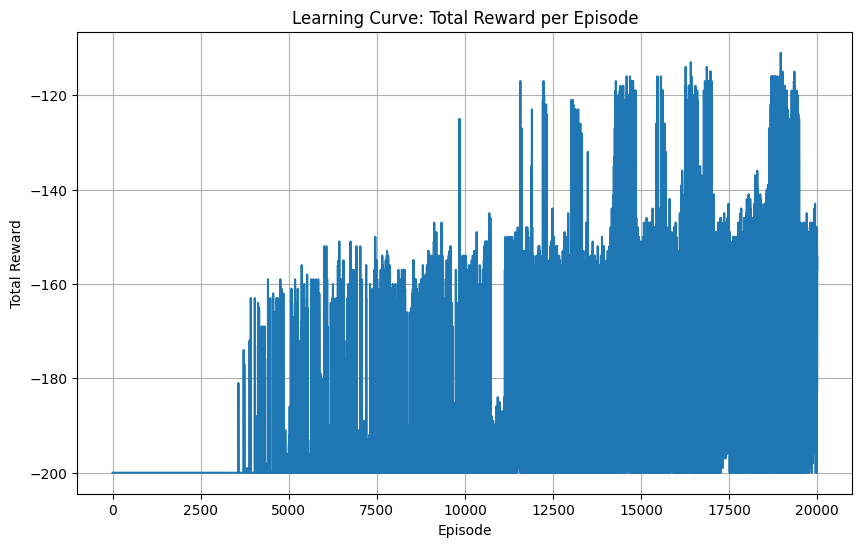

Total Reward for the Test: -200.0


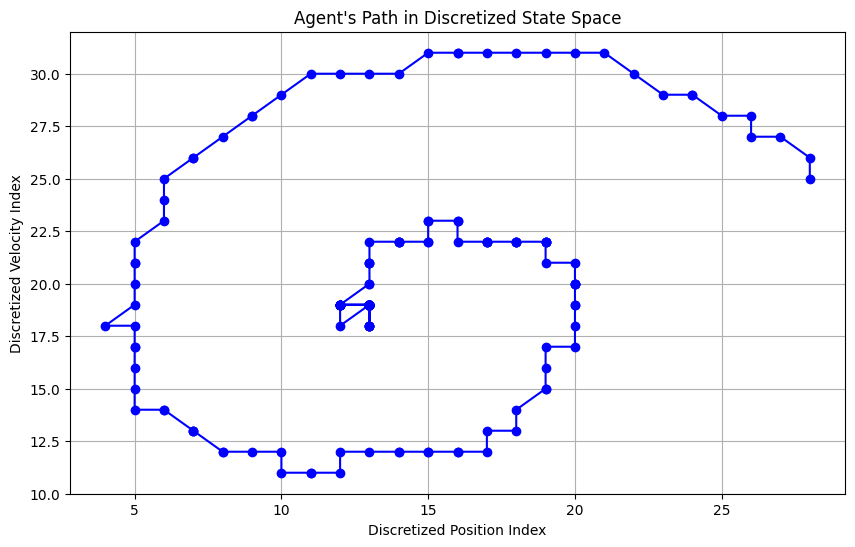

In [18]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# 1. Choose and Set Up the MountainCar-v0 Environment
env = gym.make('MountainCar-v0')

# Reset the environment before rendering
env.reset() # This line initializes the environment by calling reset

# Visualize the environment (Understand the Environment)
env.render()

# Check the state and action spaces
print("State Space:", env.observation_space)
print("Action Space:", env.action_space)

# 2. Discretize the State Space (Convert continuous state to discrete bins)
def discretize_state(state, n_bins=(40, 40)):
    """
    Convert continuous state variables (position, velocity) into discrete indices.
    """
    pos_bins = np.linspace(-1.2, 0.6, n_bins[0])  # Position bins
    vel_bins = np.linspace(-0.07, 0.07, n_bins[1])  # Velocity bins

    # Find the bin indices for position and velocity
    pos_idx = np.digitize(state[0], pos_bins) - 1
    vel_idx = np.digitize(state[1], vel_bins) - 1

    return (pos_idx, vel_idx)

# Initialize the Q-table for the discretized state-action space
n_bins = (40, 40)  # Increased resolution for better granularity
n_actions = env.action_space.n
Q_table = np.zeros(n_bins + (n_actions,))

# Define the epsilon-greedy policy for action selection
def epsilon_greedy(state, epsilon):
    """
    Choose an action using the epsilon-greedy strategy.
    """
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore (random action)
    else:
        return np.argmax(Q_table[state])  # Exploit (best known action)

# Q-Learning update function
def update_q_table(state, action, reward, next_state, alpha, gamma):
    """
    Update the Q-value for the given state-action pair using the Q-learning update rule.
    """
    max_future_q = np.max(Q_table[next_state])  # Maximum Q-value for the next state
    current_q = Q_table[state][action]  # Current Q-value
    Q_table[state][action] += alpha * (reward + gamma * max_future_q - current_q)  # Update rule

# 3. Training the Q-learning agent
def train(episodes, alpha, gamma, epsilon, epsilon_decay):
    """
    Train the Q-learning agent.
    """
    rewards_per_episode = []  # Track total rewards per episode

    for episode in range(episodes):
        state = discretize_state(env.reset())  # Reset the environment and discretize the initial state
        done = False
        total_reward = 0

        while not done:
            action = epsilon_greedy(state, epsilon)  # Select an action
            next_state, reward, done, _ = env.step(action)  # Take the action
            next_state = discretize_state(next_state)  # Discretize the next state

            # Update the Q-table
            update_q_table(state, action, reward, next_state, alpha, gamma)

            state = next_state  # Move to the next state
            total_reward += reward

        epsilon = max(epsilon * epsilon_decay, 0.05)  # Decay epsilon (minimum value: 0.05)
        rewards_per_episode.append(total_reward)

        # Display progress every 1000 episodes
        if (episode + 1) % 1000 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(rewards_per_episode)
    plt.title("Learning Curve: Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid()
    plt.show()

# 4. Testing the trained agent
def test():
    """
    Test the trained Q-learning agent.
    """
    state = discretize_state(env.reset())  # Reset the environment and discretize the initial state
    done = False
    total_reward = 0
    path = []  # Track the agent's path

    while not done:
        action = np.argmax(Q_table[state])  # Select the best action (exploit)
        next_state, reward, done, _ = env.step(action)  # Take the action
        next_state = discretize_state(next_state)  # Discretize the next state
        total_reward += reward
        path.append(state)  # Save the current state
        state = next_state  # Move to the next state

    print(f"Total Reward for the Test: {total_reward}")
    return path

# Visualizing the agent's path in the state space
def visualize_path(path):
    """
    Visualize the agent's path in the state space.
    """
    positions = [state[0] for state in path]  # Discretized positions
    velocities = [state[1] for state in path]  # Discretized velocities

    plt.figure(figsize=(10, 6))
    plt.plot(positions, velocities, marker='o', linestyle='-', color='b')
    plt.title("Agent's Path in Discretized State Space")
    plt.xlabel("Discretized Position Index")
    plt.ylabel("Discretized Velocity Index")
    plt.grid()
    plt.show()

# Hyperparameters
alpha = 0.05           # Learning rate
gamma = 0.99           # Discount factor
epsilon = 1.0          # Initial exploration rate
epsilon_decay = 0.995  # Exploration decay rate
episodes = 20000       # Number of training episodes

# Train the agent
train(episodes, alpha, gamma, epsilon, epsilon_decay)

# Test the agent
path = test()

# Visualize the learned path
visualize_path(path)

# Close the environment
env.close()


In [13]:
from huggingface_hub import notebook_login

# Log in to your Hugging Face account
notebook_login()

In [26]:
import numpy as np

# Save the Q-table
np.save("q_table.npy", Q_table)

# Save the code
with open("q_learning.py", "w") as file:
    file.write("""
import numpy as np
import random
import matplotlib.pyplot as plt

# Define constants for the environment
GRID_SIZE = 5
START_STATE = (0, 0)
GOAL_STATE = (4, 4)
OBSTACLES = [(2, 2), (3, 3)]
ACTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

# Initialize Q-table
Q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# Define reward function
def get_reward(state):
    if state == GOAL_STATE:
        return 100
    elif state in OBSTACLES:
        return -10
    else:
        return -1

# Define action selection function with epsilon-greedy policy
def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(len(ACTIONS)))  # Explore
    else:
        return np.argmax(Q_table[state[0], state[1]])  # Exploit

# Q-Learning update
def update_q_table(state, action, reward, next_state, alpha, gamma):
    max_future_q = np.max(Q_table[next_state[0], next_state[1]])
    Q_table[state[0], state[1], action] += alpha * (reward + gamma * max_future_q - Q_table[state[0], state[1], action])

# Training function
def train(episodes, alpha, gamma, epsilon, epsilon_decay):
    rewards_per_episode = []  # Store the total reward for each episode

    for episode in range(episodes):
        state = START_STATE
        done = False
        total_reward = 0  # Track total reward per episode

        while not done:
            action = epsilon_greedy(state, epsilon)
            next_state = (state[0] + ACTIONS[action][0], state[1] + ACTIONS[action][1])

            # Ensure the agent doesn't go out of bounds or into obstacles
            if next_state[0] < 0 or next_state[0] >= GRID_SIZE or next_state[1] < 0 or next_state[1] >= GRID_SIZE or next_state in OBSTACLES:
                next_state = state  # Stay in the same place if invalid move

            reward = get_reward(next_state)
            total_reward += reward
            update_q_table(state, action, reward, next_state, alpha, gamma)

            if next_state == GOAL_STATE:
                done = True
            state = next_state

        epsilon = max(epsilon * epsilon_decay, 0.05)  # Decay epsilon
        rewards_per_episode.append(total_reward)

        if (episode + 1) % 1000 == 0:  # Print every 1000 episodes
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    # Plot the learning curve
    plt.plot(rewards_per_episode)
    plt.title("Learning Curve (Total Reward per Episode)")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

# Test function
def test():
    state = START_STATE
    path = [state]
    total_reward = 0

    while state != GOAL_STATE:
        action = np.argmax(Q_table[state[0], state[1]])  # Exploit learned policy
        state = (state[0] + ACTIONS[action][0], state[1] + ACTIONS[action][1])

        # Ensure the agent doesn't go out of bounds or into obstacles
        if state[0] < 0 or state[0] >= GRID_SIZE or state[1] < 0 or state[1] >= GRID_SIZE or state in OBSTACLES:
            state = path[-1]  # Stay in the same place if invalid move
        path.append(state)
        total
import matplotlib.pyplot as plt

# Define constants for the environment
GRID_SIZE = 5
START_STATE = (0, 0)
GOAL_STATE = (4, 4)
OBSTACLES = [(2, 2), (3, 3)]
ACTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

# Initialize Q-table
Q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# Define reward function
def get_reward(state):
    if state == GOAL_STATE:
        return 100
    elif state in OBSTACLES:
        return -10
    else:
        return -1

# Define action selection function with epsilon-greedy policy
def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(len(ACTIONS)))  # Explore
    else:
        return np.argmax(Q_table[state[0], state[1]])  # Exploit

# Q-Learning update
def update_q_table(state, action, reward, next_state, alpha, gamma):
    max_future_q = np.max(Q_table[next_state[0], next_state[1]])
    Q_table[state[0], state[1], action] += alpha * (reward + gamma * max_future_q - Q_table[state[0], state[1], action])

# Training function
def train(episodes, alpha, gamma, epsilon, epsilon_decay):
    rewards_per_episode = []  # Store the total reward for each episode

    for episode in range(episodes):
        state = START_STATE
        done = False
        total_reward = 0  # Track total reward per episode

        while not done:
            action = epsilon_greedy(state, epsilon)
            next_state = (state[0] + ACTIONS[action][0], state[1] + ACTIONS[action][1])

            # Ensure the agent doesn't go out of bounds or into obstacles
            if next_state[0] < 0 or next_state[0] >= GRID_SIZE or next_state[1] < 0 or next_state[1] >= GRID_SIZE or next_state in OBSTACLES:
                next_state = state  # Stay in the same place if invalid move

            reward = get_reward(next_state)
            total_reward += reward
            update_q_table(state, action, reward, next_state, alpha, gamma)

            if next_state == GOAL_STATE:
                done = True
            state = next_state

        epsilon = max(epsilon * epsilon_decay, 0.05)  # Decay epsilon
        rewards_per_episode.append(total_reward)

        if (episode + 1) % 1000 == 0:  # Print every 1000 episodes
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    # Plot the learning curve
    plt.plot(rewards_per_episode)
    plt.title("Learning Curve (Total Reward per Episode)")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

# Test function
def test():
    state = START_STATE
    path = [state]
    total_reward = 0

    while state != GOAL_STATE:
        action = np.argmax(Q_table[state[0], state[1]])  # Exploit learned policy
        state = (state[0] + ACTIONS[action][0], state[1] + ACTIONS[action][1])

        # Ensure the agent doesn't go out of bounds or into obstacles
        if state[0] < 0 or state[0] >= GRID_SIZE or state[1] < 0 or state[1] >= GRID_SIZE or state in OBSTACLES:
            state = path[-1]  # Stay in the same place if invalid move
        path.append(state)
        total_reward += get_reward(state)

    print(f"Final Path: {path}")
    print(f"Total Reward for the Path: {total_reward}")
    return path

# Visualization of the path
def visualize_path(path):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for (x, y) in OBSTACLES:
        grid[x, y] = -10
    grid[GOAL_STATE[0], GOAL_STATE[1]] = 100

    for (x, y) in path:
        grid[x, y] = 1  # Mark the path

    plt.imshow(grid, cmap="coolwarm", origin="upper")
    plt.colorbar()
    plt.title("Agent Path")
    plt.show()

# Visualize Q-values as heatmaps for each action
def visualize_q_values():
    for action_idx in range(len(ACTIONS)):
        q_values = np.zeros((GRID_SIZE, GRID_SIZE))
        for row in range(GRID_SIZE):
            for col in range(GRID_SIZE):
                q_values[row, col] = Q_table[row, col, action_idx]

        plt.imshow(q_values, cmap="coolwarm", origin="upper")
        plt.colorbar()
        plt.title(f"Q-values for Action {action_idx} (Right=0, Down=1, Left=2, Up=3)")
        plt.show()

# Parameters
alpha = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.995
episodes = 10000

# Train the agent
train(episodes, alpha, gamma, epsilon, epsilon_decay)

# Test the agent
path = test()

# Visualize the learned path
visualize_path(path)

# Visualize Q-values
visualize_q_values()
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# 1. Choose and Set Up the MountainCar-v0 Environment
env = gym.make('MountainCar-v0')

# Reset the environment before rendering
env.reset() # This line initializes the environment by calling reset

# Visualize the environment (Understand the Environment)
env.render()

# Check the state and action spaces
print("State Space:", env.observation_space)
print("Action Space:", env.action_space)

# 2. Discretize the State Space (Convert continuous state to discrete bins)
def discretize_state(state, n_bins=(40, 40)):
    """    """

    Convert continuous state variables (position, velocity) into discrete indices.
    """    """

    pos_bins = np.linspace(-1.2, 0.6, n_bins[0])  # Position bins
    vel_bins = np.linspace(-0.07, 0.07, n_bins[1])  # Velocity bins

    # Find the bin indices for position and velocity
    pos_idx = np.digitize(state[0], pos_bins) - 1
    vel_idx = np.digitize(state[1], vel_bins) - 1

    return (pos_idx, vel_idx)

# Initialize the Q-table for the discretized state-action space
n_bins = (40, 40)  # Increased resolution for better granularity
n_actions = env.action_space.n
Q_table = np.zeros(n_bins + (n_actions,))

# Define the epsilon-greedy policy for action selection
def epsilon_greedy(state, epsilon):
        """
"""
    Choose an action using the epsilon-greedy strategy.
    """    """

    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore (random action)
    else:
        return np.argmax(Q_table[state])  # Exploit (best known action)

# Q-Learning update function
def update_q_table(state, action, reward, next_state, alpha, gamma):
    """
       """
 Update the Q-value for the given state-action pair using the Q-learning update rule.
    """    """

    max_future_q = np.max(Q_table[next_state])  # Maximum Q-value for the next state
    current_q = Q_table[state][action]  # Current Q-value
    Q_table[state][action] += alpha * (reward + gamma * max_future_q - current_q)  # Update rule

# 3. Training the Q-learning agent
def train(episodes, alpha, gamma, epsilon, epsilon_decay):
    """
        """
Train the Q-learning agent.    """

    """
    rewards_per_episode = []  # Track total rewards per episode

    for episode in range(episodes):
        state = discretize_state(env.reset())  # Reset the environment and discretize the initial state
        done = False
        total_reward = 0

        while not done:
            action = epsilon_greedy(state, epsilon)  # Select an action
            next_state, reward, done, _ = env.step(action)  # Take the action
            next_state = discretize_state(next_state)  # Discretize the next state

            # Update the Q-table
            update_q_table(state, action, reward, next_state, alpha, gamma)

            state = next_state  # Move to the next state
            total_reward += reward

        epsilon = max(epsilon * epsilon_decay, 0.05)  # Decay epsilon (minimum value: 0.05)
        rewards_per_episode.append(total_reward)

        # Display progress every 1000 episodes
        if (episode + 1) % 1000 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(rewards_per_episode)
    plt.title("Learning Curve: Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid()
    plt.show()

# 4. Testing the trained agent
def test():
    """
   """ Test the trained Q-learning agent.
    """"""
    state = discretize_state(env.reset())  # Reset the environment and discretize the initial state
    done = False
    total_reward = 0
    path = []  # Track the agent's path

    while not done:
        action = np.argmax(Q_table[state])  # Select the best action (exploit)
        next_state, reward, done, _ = env.step(action)  # Take the action
        next_state = discretize_state(next_state)  # Discretize the next state
        total_reward += reward
        path.append(state)  # Save the current state
        state = next_state  # Move to the next state

    print(f"Total Reward for the Test: {total_reward}")
    return path

# Visualizing the agent's path in the state space
def visualize_path(path):
   """ """
    Visualize the agent's path in the state space.
    """"""
    positions = [state[0] for state in path]  # Discretized positions
    velocities = [state[1] for state in path]  # Discretized velocities

    plt.figure(figsize=(10, 6))
    plt.plot(positions, velocities, marker='o', linestyle='-', color='b')
    plt.title("Agent's Path in Discretized State Space")
    plt.xlabel("Discretized Position Index")
    plt.ylabel("Discretized Velocity Index")
    plt.grid()
    plt.show()

# Hyperparameters
alpha = 0.05           # Learning rate
gamma = 0.99           # Discount factor
epsilon = 1.0          # Initial exploration rate
epsilon_decay = 0.995  # Exploration decay rate
episodes = 20000       # Number of training episodes

# Train the agent
train(episodes, alpha, gamma, epsilon, epsilon_decay)

# Test the agent
path = test()

# Visualize the learned path
visualize_path(path)

# Close the environment
env.close()

""")

In [27]:
from huggingface_hub import create_repo

create_repo("marinareda/gridworld-mountaincar-q-learning", repo_type="model")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


RepoUrl('https://huggingface.co/marinareda/gridworld-mountaincar-q-learning', endpoint='https://huggingface.co', repo_type='model', repo_id='marinareda/gridworld-mountaincar-q-learning')

In [28]:
from huggingface_hub import upload_file

# Upload the Q-table file
upload_file(
    path_or_fileobj="q_table.npy",
    path_in_repo="q_table.npy",  # Path inside the repo
    repo_id="marinareda/gridworld-mountaincar-q-learning"
)

# Upload the Python code
upload_file(
    path_or_fileobj="q_learning.py",
    path_in_repo="q_learning.py",  # Path inside the repo
    repo_id="marinareda/gridworld-mountaincar-q-learning"
)

q_table.npy:   0%|          | 0.00/38.5k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/marinareda/gridworld-mountaincar-q-learning/commit/2a2c67163195c5d172b17402f29bba275eae52a9', commit_message='Upload q_learning.py with huggingface_hub', commit_description='', oid='2a2c67163195c5d172b17402f29bba275eae52a9', pr_url=None, repo_url=RepoUrl('https://huggingface.co/marinareda/gridworld-mountaincar-q-learning', endpoint='https://huggingface.co', repo_type='model', repo_id='marinareda/gridworld-mountaincar-q-learning'), pr_revision=None, pr_num=None)